In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# ___Linear Regression: Least Squares___
-----------

In [1]:
# Linear models express the target output value in terms of the sum of weighted input variables.

# e.g. If we intend to predict the market value of a house;
# let's say that we are given two features -> age of the house, tax per year

# In general we'd expect a positive correlation between the tax assessment and the market price of the house
# The more valuable the property, the higher its evaluated tax will be.

# And age will likely have a negative correlation with the market value,
# the older the house, lesser the value becomes except for antique places.

In [2]:
# Let's see a dummy example 

## ___House features: tax per year ($X_{tax}$), age in years($X_{age}$)___
## ___$Y_{price}$ = $212,000$ + $(109 \cdot X_{tax})$ - $(2,000 \cdot X_{age})$___

In [9]:
# This linear model will estimate the market price of a house that has an evaluated tax value of 10,000 and 75 years old.
# Predicted selling price will be,

print(f"{212_000 + (109 * 10_000) - (2_000 * 75):3,}")

1,152,000


In [10]:
# This is a made up linear model.
# In reality, when we train linear models, it involves estimating the parameters of the model
# e.g. the constants given in this model (212000, 109 & 2000)

In [11]:
# Linear regression is an example of a linear model.
# In linear regression, there may be multiple input variables (features). -> x_0, x_1, x_2 ... x_n
# Each feature x_i has a corresponding weight w_i
# Predicted output is the weighted sum of inputs + a constant term

# the names with a hat indicte that they are estimated during the learning process.

___Input variables (features):___
## ___$x~=~(x_0, x_1, x_2, x_3 .... x_n)$___

___Output:___
## ___$\hat{y}~=~\hat{w_0}x_0~+~\hat{w_1}x_1 ... \hat{w_n}x_n~+~\hat{b}$___

___Parameters:___
## ___$\hat{w}~=~\hat{w_0}~+~\hat{w_1}~+~\hat{w_2} ... \hat{w_n}$ &rarr; feature weights or model coefficients___
## ___$\hat{b}$ &rarr; constant bias term or intercept___

In [12]:
# the w_hat and b_hat are estimated from the training data.
# y_hat is estimated from the linear function of test values (input feature values) and the feature weights.

In [13]:
# If we take our housing price example;

# w1_hat is 109
# x1 is 10,000 (tax per year)

# w2_hat is 2,000
# x2 is 75 (age)

# b_hat is 212,000 (start price)

## ___Linear Regression Model with One Feature___
---------------

In [14]:
# Input -> x_0
# Predicted output -> y_hat = w0_hat * x_0 + b_hat
# Model coefficients -> w0_hat (slope), b_hat (intercept)

## ___$\hat{y}~=~\hat{w_0}x_0~+~\hat{b}$___

In [15]:
# This resembles the formula of a straingt line.

In [49]:
x_train = np.random.randint(low = 50, high = 300, size = 100)
y_train = 2 * x_train + np.random.randint(low = -50, high = 50, size = 100)

w0_hat = 1.65134     # one feature -> one weight
b_hat = 43.0831

y_hat0 = (w0_hat * x_train) + b_hat

w0_hat /= 5.53
y_hat1 = (w0_hat * x_train) + b_hat

b_hat += 100
y_hat2 = (w0_hat * x_train) + b_hat

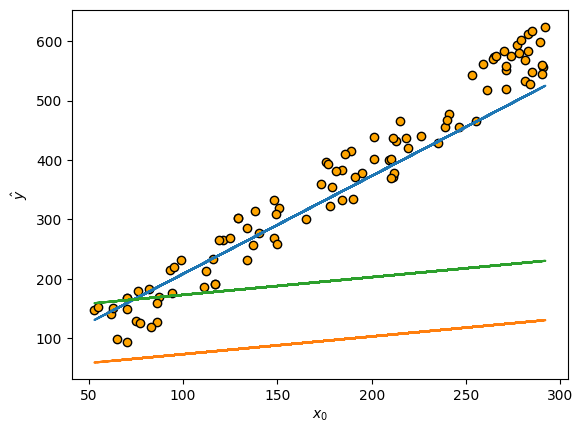

In [50]:
plt.scatter(x_train, y_train, color = "orange", edgecolor = "black")
plt.plot(x_train, y_hat0)
plt.plot(x_train, y_hat1)
plt.plot(x_train, y_hat2)
plt.xlabel("$x_0$")
plt.ylabel("$\hat{y}$")
plt.show()

In [51]:
# In the learning phase, our model has to estimate the w0_hat and b_hat parameters from the training data 
# which will contain x0 values (feature).

In [52]:
# The lines in the graph represent the linear regression models used to explain the data.
# Of the three linear models, the blue one seems to be the best fit.
# Since there aren't many points far above the line or far below the line.

## ___Estimation of Model Parameters___
---------

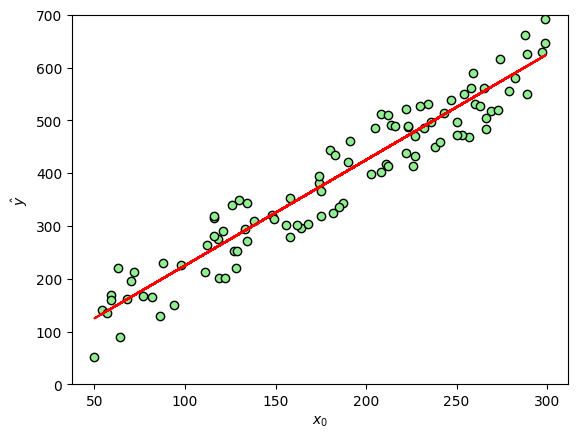

In [18]:
x = np.random.randint(low = 50, high = 300, size = 100)
y_hat = 2 * x + np.random.randint(low = -50, high = 100, size = 100)

plt.scatter(x, y_hat, color = "lightgreen", edgecolor = "black")
plt.plot(x, 2 * x + 25, color = "red")
plt.xlabel("$x_0$")
plt.ylabel("$\hat{y}$")
plt.ylim(0, 700)
plt.show()
# plt.savefig("linearregression.jpeg", format = "jpeg", dpi = 400)

## ___Least Squares Linear Regression___
----------------

In [ ]:
# In our simple one feature linear regression model the slope is w0 (weight) and the intercept is b_hat (bias).
# The red regression line => y_hat = w0 . x_hat + b_hat

# w0 -> slope of the regression line.
# b_hat -> y intercept of the regression line.

In [13]:
# One commonly used method for estimating the model parameters of linear regression models is least squares linear regression.
# Also known as ordinary least squares.

# least squares regression finds the line through the data points that minimizes the squared error of the model.
# Mean squared error of a model is the sum of the squared differences of the predicted targets and the real target values for all entities
# in the training set.

<img src="./linearregression.jpeg" height=500 width=800>

In [19]:
# Here the green points are from the training set.
# The red line is the least squares model found through the training points.
# The blue vertical lines show the difference in the predicted y_hat values (in the red line) and their corresponding real y values.

In [25]:
# If we take the first blue line (x = 75), the predicted y_hat value is around 150, but the real y value is 100.
print(f"squared error = (150 - 100) ^ 2 = {(150 - 100) ** 2}")

# For the second blue line (x = 240), the predicted y_hat value is around 490, but the real value is around 580.
print(f"squared error = (490 - 580) ^ 2 = {(490 - 580) ** 2}")

squared error = (150 - 100) ^ 2 = 2500
squared error = (490 - 580) ^ 2 = 8100


In [26]:
# We can compute these squared errors for all the points in the training set.
# And then add them all up and divide by the number of points to get the mean squared error.

## ___$\bar{sq.err}~=~\frac{\sum_{i = 0}^{n}{sq.err_i}}{n}$___

In [27]:
# In linear regression models there are no parameters to control the model complexity.
# No matter what the values of w and b, the result is always going to be a straight line.
# This is both a strenght & weakness of linear regression.

In [28]:
# Comparing this simple linear regression model with a complex kNN regresion model,
# Linear regression models make strong assumptions about the relationships between the input x and the output y.
# Linear models generalize particularly well for data with many features, albeit being simple.

## ___How do we estimate the w and b parameters?___
------------

In [29]:
# These model parameters are estimated from the training data.

# There are many ways to figure out these parameters, depending on
        # criteria we'd like to use to define a good fit
        # how you want to control model complexity
        
# In the case of linear models, model complexity is based on the weights of the input features.
# Simpler linear models have a weight vector w, that is closer to 0, where most features are not influential on the outcome 
# / not used at all and consequently have 0 weight.

# Linear regressors then predict the target value for each training set entity and computes a loss function.
# Loss function is a penalty value for incorrect predictions.
# A prediction is incorrect when the predicted target value != actual target value in training set.

In [30]:
# Linear regressors then search for w and b parameters that minimize the sum of the loss values over all training points.

## ___Least squares linear regression___
------------

In [31]:
# This is a method that finds the w and b values that minimize the error between the predicted and original points.
# In other words, it minimizes the mean squared error.
# Note that these predictions are made on the training set.

# ___$RSS(w, b)~=~\sum_{i = 1}^{N}{(y_i~-~(w \cdot x_i~+~b))^2}$___

In [32]:
# Sum of squared differences is also noted as Residual Sum of Squares (RSS)
# The real y value (from training set) is given as y_i and the predicted y value is given as (w.x_i + b) on the right side.

## ___Linear Regression in Sklearn___
-------------

In [36]:
x = np.random.randint(low = 100, high = 1000, size = 10_000)
y = 2 * x + np.random.normal(loc = 30, scale = 10.5, size = 10_000)
x = x.reshape(-1, 1)

In [38]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 2023 - 5 - 9, train_size = 0.85)

In [41]:
# Fitting the model
linreg = LinearRegression().fit(train_x, train_y)

In [67]:
# Model coefficients
# w
linreg.coef_

array([2.00025037])

In [ ]:
# Since there's just one feature, only one coefficient is there.

In [45]:
# b
linreg.intercept_

29.84566795351884

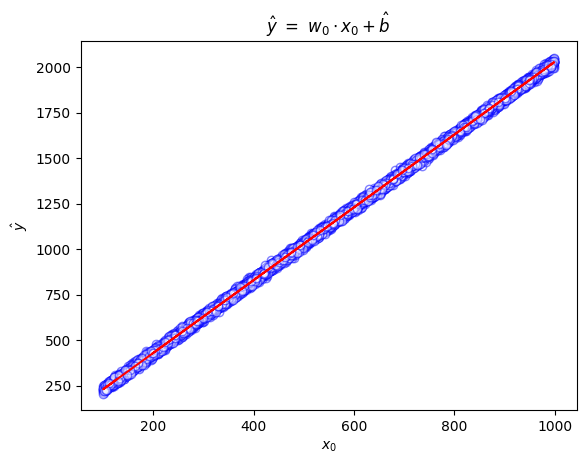

In [66]:
# See this visually 

plt.scatter(train_x, train_y, color = "white", edgecolor = "blue", alpha = 0.5)
plt.plot(x, linreg.coef_ * x + linreg.intercept_, color = "red")
plt.title("$\hat{y}~=~w_0 \cdot x_0 + \hat{b}$")
plt.xlabel("$x_0$")
plt.ylabel("$\hat{y}$")
plt.show()

In [68]:
# In sklearn, attributes that end with a underscore indicate that they were learned from the training data, not set by the user.
# e.g. linreg.coef_

In [72]:
# Model performance -> R^2 values

# on training data
linreg.score(train_x, train_y)

0.999577904071322

In [73]:
# on test data
linreg.score(test_x, test_y)

0.9995649197044753